# Homework Starter — Stage 10b: Time Series & Classification
Fill in the TODOs. Use your own dataset or adapt the synthetic generator below.

In [2]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit
np.random.seed(7); sns.set(); plt.rcParams['figure.figsize']=(9,4)

## Option A: Use Your Own Data (Recommended)
Load your data here (ensure a DateTime index for time series).

In [3]:
# TODO: load your data
df = pd.read_csv('../data/raw/fraud_kaggle_creditcard_source-kaggle_dataset-creditcardfraud_20250820-192958.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Option B: Synthetic Generator (Use if you don't have data ready)

In [4]:
# # Synthetic series with regimes & jumps
# n=500
# dates=pd.bdate_range('2021-01-01', periods=n)
# mu = np.where(np.arange(n)<n//2, 0.0003, -0.0001)
# sigma = np.where(np.arange(n)<n//2, 0.01, 0.015)
# eps = np.random.normal(mu, sigma)
# jumps = np.zeros(n); jump_days = np.random.choice(np.arange(20,n-20), size=5, replace=False)
# jumps[jump_days] = np.random.normal(0,0.05,size=len(jump_days))
# rets = eps + jumps
# price = 100*np.exp(np.cumsum(rets))
# df = pd.DataFrame({'price':price}, index=dates)
# df['ret'] = df['price'].pct_change().fillna(0.0)
# df['log_ret'] = np.log1p(df['ret'])
# df.head()

## Feature Engineering

In [5]:
# Not really a good option due to the problem not being time series


# # TODO: create at least two features
# df['lag_1'] = df['ret'].shift(1)
# df['roll_mean_5'] = df['ret'].rolling(5).mean().shift(1)
# # Add your own:
# # df['roll_vol_20'] = df['ret'].rolling(20).std().shift(1)
# df['y_next_ret'] = df['ret'].shift(-1)
# df['y_up'] = (df['y_next_ret']>0).astype(int)
# df_feat = df.dropna().copy()
# df_feat.head()

## Split

In [6]:
# Time-aware split
df_feat = df.dropna().copy()
df_feat.head()
cut=int(len(df_feat)*0.8)
train, test = df_feat.iloc[:cut], df_feat.iloc[cut:]
features =[f'V{i}' for i in range(1, 29)] + ['Time', 'Amount']
X_tr, X_te = train[features], test[features]
y_tr_reg, y_te_reg = train['Class'], test['Class']
y_tr_clf, y_te_clf = train['Class'], test['Class']

## Pipeline + Model (Choose one track below)

In [7]:
# Track 1: Forecasting returns
# bad for this use case as we want classification
reg = Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())])
reg.fit(X_tr, y_tr_reg)
pred = reg.predict(X_te)
rmse = mean_squared_error(y_te_reg, pred)
print('RMSE:', rmse)

RMSE: 0.0007427440431515436


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.89      0.56      0.69        75

    accuracy                           1.00     56962
   macro avg       0.95      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



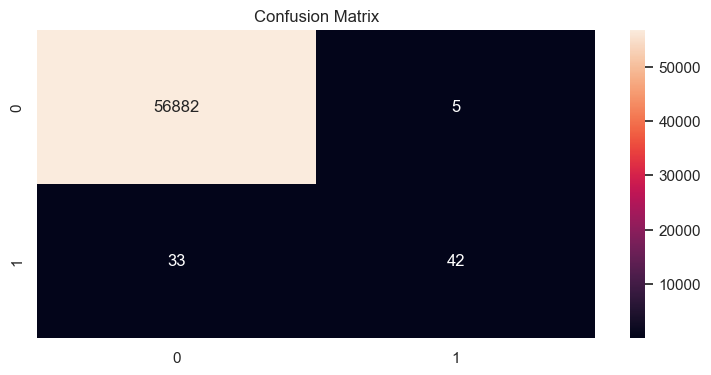

In [10]:
# Track 2: Classification (up/down)
from matplotlib.pyplot import savefig
clf = Pipeline([('scaler', StandardScaler()), ('logit', LogisticRegression(max_iter=1000))])
clf.fit(X_tr, y_tr_clf)
predc = clf.predict(X_te)
print(classification_report(y_te_clf, predc))
cm = confusion_matrix(y_te_clf, predc)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); 
savefig('../data/images/confusion_matrix.png'); plt.show()

## Interpretation (Markdown)
- What worked? Did not attempt time series due to the nature of the data not being temporal and being a case by case transaction. The classification worked, but with poor results. All features were used to predict the Classifier, Class. The score is better than the homework dataset, with .69 f1 score, meaning that it is decent but not good enough. Particularily the recall for 1 is low which means that a lot of fraudulent transactions are not being tagged. 
- Where might assumptions fail?
The V featuers from the CPA may not all have linear relationships and just be predicted features, so fine-tuning of usage must be done. We assumed good data quality, and th eonly issue that may arise is a low amount of fraudulent cases which might make the training more difficult. 
- How would you extend features or model?
For classification I would try different sets of features, and also the specific features outlined in the previous documents basedon othe correlation matrix. 

### Save Notebook
Remember to save as `notebooks/modeling_<team>.ipynb`.